
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [8]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [9]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

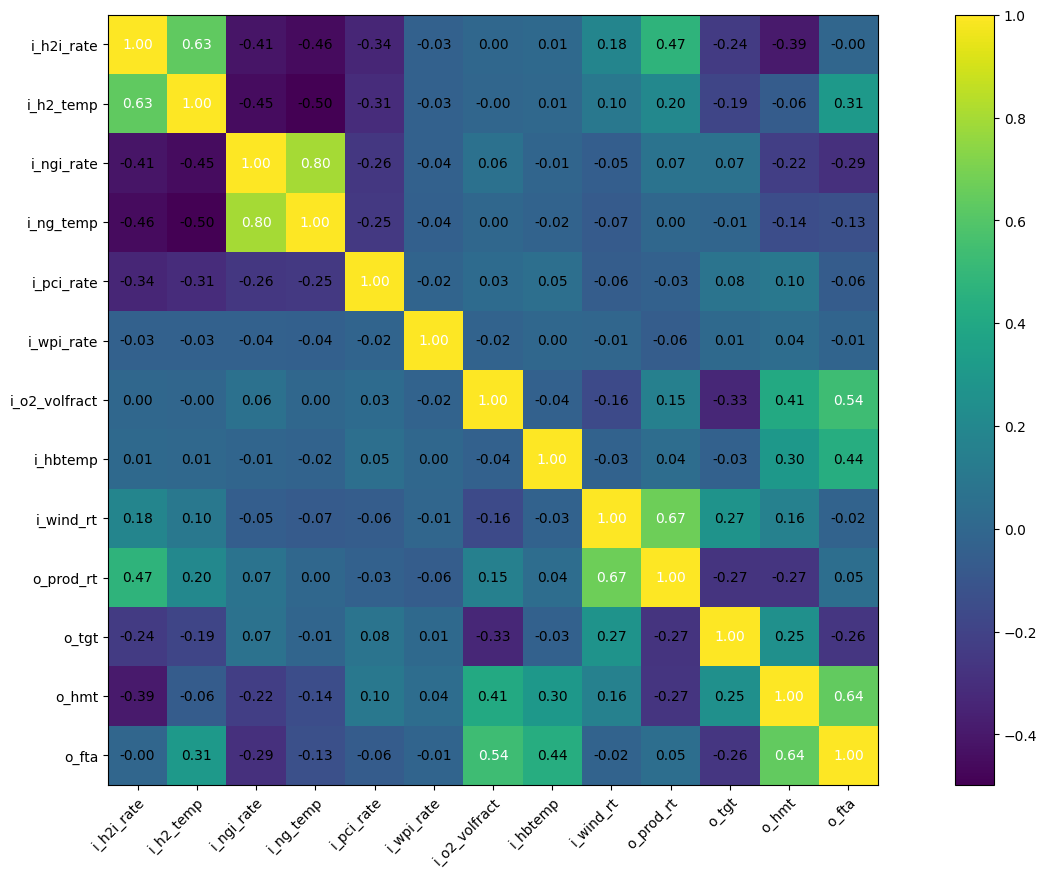

In [10]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [11]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [12]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [13]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [14]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [15]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [16]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [19]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [22]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [23]:

n_inputs  = 4     ## 7
n_outputs = 4




#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(n_inputs, n_outputs)       
        
        ## F2
        self.f2_linear1 = nn.Linear(n_inputs, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, n_outputs)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [24]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [25]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     F1plusF2_SIO_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [26]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 1.1953154802322388
100 ..... 0.7561743855476379
200 ..... 0.8738078474998474
300 ..... 0.7301245331764221
400 ..... 0.7548283934593201
500 ..... 0.6018260717391968
600 ..... 0.6737936735153198
700 ..... 0.6056163907051086
800 ..... 0.655177652835846
900 ..... 0.5511366128921509


In [27]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  98.0239, 1297.1589, 8440.7246, 2306.0759]])
y_deviations: tensor([[  50.6256,  523.1470, 1517.9091,  211.8964]])
x_means: tensor([[    -0.0000,      0.0000,     -0.0000,      0.0000]])
x_deviations: tensor([[364.1888, 157.1047,  51.6017,  31.5166]])


In [28]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.3982,  774.0120, 6922.8154, 2094.1794]])
tensor([[ 148.6495, 1820.3059, 9958.6338, 2517.9724]])


In [29]:

print(PDFshapingOBJ.x_means -  PDFshapingOBJ.x_deviations)
print(PDFshapingOBJ.x_means +  PDFshapingOBJ.x_deviations)


tensor([[-364.1888, -157.1047,  -51.6017,  -31.5166]])
tensor([[364.1888, 157.1047,  51.6017,  31.5166]])



## Is model  invertible ?

* use the Jacobian


In [30]:

import torch
from torch.autograd.functional import jacobian


In [31]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [32]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [33]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [34]:

print( len(J) )


1


In [35]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [36]:

u, s, v = torch.svd(J)  


In [37]:

rank = (s > 1e-5).sum()


In [38]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [39]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[-9224.0488,   652.9518,  -236.2454,  -980.1940]],
       grad_fn=<AddBackward0>)



## Approach


In [40]:


def solve_minimum_norm_update( x0, target_y):
   
    
    # Ensure the input requires gradients

    x = x0.detach().clone().requires_grad_(True)
    

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y
    
    print( J.shape )
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    ####################################
    #J_pinv = torch.pinverse(J)
    
    U, S, Vt = torch.linalg.svd(J)
    S_inv = torch.where(S > 1e-2, 1.0/S, torch.zeros_like(S))
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T

    
    ####################################
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    ## delta_x = J_pinv @ delta_y
    delta_x = 0.01 * (J_pinv @ delta_y)

    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x







In [41]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(10):
        
        delta_x  = solve_minimum_norm_update( x_temp, target_y )
        x_temp   = x_temp + delta_x
        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    x_new_solution    = pca.inverse_transform( x_new_np   )
    x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_solution )
    print( x_real_np_sol )
    
    print(i)
    print('********************************')



torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.8654354     2.31363293   61.40690303   25.88349822  290.95435555
 1196.56322023  199.8973738 ]
[   4.51473395   92.87725382    2.73589975   25.42966692   -0.1023509
 1480.17185623  195.77503495]
1
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.14065501    2.90304669   84.5642128    26.09875132  297.5779206
 1195.19135929  198.47591193]
[  19.47752163    0.48105558    0.42333255   25.33486597  299.99581098
 1200.04932786  203.6868961 ]
2
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])


torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.80729384    1.14295872   76.36267259   25.99234295  325.35816007
 1240.42378543  198.88295871]
[  33.60707769   -1.22793509   -1.08064512   25.98506406 1199.97150638
 1199.86511585  204.81521069]
32
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.68563447    1.92629412   62.50197215   25.85993539  343.38082871
 1269.26269789  199.53902861]
[  19.78987098    1.5685876     1.60230206   24.96601235  299.84744691
 1600.01419876  201.5009325 ]
33
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.67469217    1.44148826   78.853427

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   5.04817795   -5.03058926  112.06741548   26.0855794   173.72145262
 1314.82249828  196.5963813 ]
[  32.59001401    3.16097338    3.23030024   26.04993901 1199.6436548
 1200.01665282  204.26752007]
70
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.07044318    3.45525365   89.92026528   26.12638042  333.86241376
 1247.46500134  197.88698797]
[   7.79634563    2.06897687  101.88414655   25.85825524  299.99813175
 1600.18306285  195.41877806]
71
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.30514423    3.02795158   88.46281363   26.10602271  334.19136873
 1252.69696649  197.97640128]
[  12.92126875    0.56862738   60.30033254   25.48042274  300.22535143
 1600.21464508  198.02505078]
106
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.21035549    1.50123898   78.79503238   26.02707143  310.11021791
 1217.23784333  198.81565159]
[  13.71003997   -0.31234292   49.6367397    25.76644565  300.0933827
 1200.03449669  200.77043098]
107
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.83688482    1.50410002   69.87538102   25.96067258  284.75205946
 1184.42081706  199.49509731]
[  -4.31138967  174.21592068   -0.79082496   25.899848      0.06892074
 1479.98598696  190.67826608]
143
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.29913363    3.85042189   71.56969971   25.95688895  338.43716981
 1260.56084923  198.90583905]
[  19.30094861    3.76214976    3.61232897   24.99715292  299.81694405
 1600.19530723  201.23551729]
144
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.97166923    1.71329334   84.37201358   26.05897181  335.77571317
 1256.70158258  198.2901497 ]
[  -2.18658494   -0.41273465  149.59109482   26.04156917    0.03681963
 1599.98893379  192.39589797]
180
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.7202834     1.27446491   47.6297769    25.82163151  302.92723088
 1136.72451554  201.11429018]
[   9.97825684   42.50802678    1.53815764   25.37897512   -0.1570265
 1200.01244435  200.56736673]
181
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.91050016    0.83322645   68.59243866   25.91728961  333.67895142
 1251.28164611  199.32493693]
[  11.08017079   -1.9972448    78.18389974   25.62341084  300.02056723
 1599.82617897  197.11565489]
217
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.16087393    1.25626856   79.46244784   26.03292372  310.37163655
 1215.94454054  198.79826584]
[  20.90870638   -3.95218628   -3.92190639   24.99926647  300.31902008
 1479.88964406  202.8088758 ]
218
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.30578562    2.11338767   65.39424376   25.92139155  284.7351182
 1187.8282338   199.70818071]
[   4.10061383   92.92158076    2.77019458   25.70039146   -0.09768369
 1200.1799958   197.20074628]
255
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.05199151    1.3711621    69.66037984   25.95177169  294.81625098
 1198.631931    199.45447586]
[  10.63272616   -0.78986086   40.4059086    25.21776335   -0.13461595
 1447.83429049  199.78361175]
256
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

[  10.36032595    3.81319218   79.40386301   26.02459934  337.66779835
 1261.54601127  198.42990593]
[   6.52311486    3.15309644   73.00950174   25.38417074   -0.13629841
 1600.17693838  196.78117547]
292
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   8.80061773    1.10929545   90.56021362   26.13626126  307.50991791
 1207.67281605  198.17779374]
[  25.2242579    -4.50175273   -4.52034841   25.48540196  600.40142802
 1199.9104929   204.61990992]
293
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.50241005    2.6864876    85.1100498    26.08544314  320.54858738
 1230.44526

torch.Size([1, 4, 4])
[   9.36862019    0.70981977   84.71743263   26.08687464  297.41028915
 1194.77348544  198.6118292 ]
[  13.32775325   -3.82608626   56.22593706   25.8035196   300.28370648
 1199.87565405  200.60340568]
330
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.53903761    1.58819131   60.47856996   25.85630613  318.92014038
 1233.28599009  199.84183711]
[   8.16249732    1.12885182   61.17229438   25.26691994   -0.12391619
 1599.99705891  197.62826449]
331
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   8.69722561   -0.50418911   92.27430457   26.09026198  29

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   8.4808991     4.43587129   89.3063556    26.15053392  302.42580029
 1198.6537061   198.07708967]
[   5.941635      3.18096566   73.00682371   25.77023437   -0.13428352
 1200.19438385  198.82330295]
368
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.6361384     4.00643327   77.09894834   26.02511103  340.89776151
 1243.57338332  198.65147091]
[  -1.88898544   89.63232634   59.63730044   25.91450208    0.03220643
 1479.98919621  192.55580372]
369
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.74052156    0.71115955   41.34202181   25.76563731  315.87430608
 1143.42403596  201.50940755]
[   9.97319637   42.52575644    1.56399292   25.37931796   -0.15470687
 1200.00955402  200.56466799]
404
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.66250622    3.19386176   81.65083226   26.07862986  310.61653811
 1201.24742441  198.61511084]
[  12.33240242   -2.95979155   67.14345474   25.63542966  300.14615282
 1479.85439389  198.45758136]
405
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.72134709    2.06180475   79.1551

torch.Size([1, 4, 4])
[  11.95833115    2.33370695   58.99773322   25.88660156  281.49875147
 1163.9955165   200.19807015]
[   9.86956992    3.60865683   44.45900962   25.13376538   -0.19349375
 1600.18630143  198.47342686]
436
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.50902531    2.59789923   75.10597336   26.00129597  309.16099921
 1216.3155862   198.97030293]
[   9.2562309    21.26977009   31.28931318   25.24178557   -0.14849217
 1480.00975307  198.72880573]
437
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.67065485    3.66640853   81.28109479   26.09446009  31

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   1.48862437    4.70642064  118.73045199   26.10131483   63.15953779
 1336.12319478  195.33626513]
[  10.85753388   -0.81392533   40.3872944    25.07079862   -0.13715725
 1599.82986489  199.0096541 ]
469
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.2677021     4.35200882   76.72758204   26.02131059  317.90239424
 1228.45995168  198.7048963 ]
[  23.16988928    4.34698498    4.20487567   25.61652324  599.75500343
 1200.20195966  203.51373425]
470
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
[  11.56768901    2.18898476   58.90676986   25.90184801  257.5764962
 1127.86754845  200.37301875]
[   0.77587314    2.28877773  122.11958101   25.81437907   -0.04804505
 1600.17371404  193.87550436]
502
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.10118525    2.54289398   77.60510735   26.02823124  302.52474373
 1205.86482452  198.86973079]
[  -7.97379638  201.09094615    0.90769988   26.35049166    0.09352885
 1200.16259308  190.25097248]
503
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.70806795    1.59872633   77.50634155   26.00202265  330

torch.Size([1, 4, 4])
[  10.91651607    1.6241448    75.89765796   25.98810957  331.69408488
 1248.52778815  198.84469437]
[  20.09320446   -0.60269319   -0.68000127   25.07924271  300.14734464
 1448.04819972  202.55716542]
538
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   0.92309333    4.93417375  118.93297983   26.15566082   36.41482864
 1262.35572701  195.65861669]
[   5.28009616    0.81808702   80.82398171   25.82520405   -0.08569029
 1200.0120461   198.50704399]
539
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.04885912    3.96238153   86.8920592    26.11295988  31

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.17854214    1.77532026   71.89838869   25.96069952  320.3432386
 1232.33857674  199.14710534]
[  23.92288215    1.05575014    1.04439025   25.5685155   599.93418079
 1200.0356293   203.92028714]
576
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.75612532    1.00010405   85.17774444   26.07286259  324.5615708
 1236.45200757  198.38005607]
[  25.21413808   -4.46629369   -4.46868348   25.48608766  600.4060978
 1199.90468197  204.61451297]
577
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4

[   8.61332171    5.81458549   89.66565343   26.14249262  320.85506258
 1233.39701611  197.8068171 ]
[  32.62417309    3.17691776    2.96523992   26.047688   1199.91281999
 1200.22444246  204.28168183]
613
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.28683376    0.91103324   80.24885788   26.03173077  320.81022735
 1230.30492989  198.71072454]
[  21.16771681   -5.03212771   -5.04653246   24.98274214  300.47002935
 1479.90153574  202.94731479]
614
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.12461974    2.12496697   80.01643097   26.03622019  317.56473931
 1228.74897

torch.Size([1, 4, 4])
[   8.82430047    3.39558158   93.13883034   26.15358397  341.71285321
 1254.56101422  197.66855837]
[  -2.6755073     1.78082469  151.60112431   26.07270974    0.00631681
 1600.17004232  192.13048279]
651
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   4.35875106    2.81869443  102.41984925   26.02415398  113.87914861
 1293.5043981   196.71323683]
[   8.67165985   -1.13562898   59.05893732   25.23440804   -0.10272205
 1599.82754206  197.90447384]
652
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.59788569    2.40024507   77.01353782   26.00277188  32

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.15189836    1.12438957   66.21032182   25.89898545  333.21784928
 1249.8620426   199.45639054]
[  33.75712699   -0.17459232    0.03552389   25.73120674 1199.81816504
 1479.84218109  203.24836166]
689
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.61880666    3.09101484   66.12059224   25.91956688  314.55145748
 1225.77760427  199.43727825]
[   9.6295811     3.68591241   44.55512455   25.28175865   -0.18399341
 1448.18201687  199.23928863]
690
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   2.26332723   -2.43950993  125.02497865   26.14209994  109.17835614
 1341.78178729  195.44154142]
[  25.02364547   -1.27206206   -1.11795621   25.14925425  599.94872054
 1599.85447824  202.15976635]
727
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.03007744    3.27074551   77.98402228   26.01285395  364.80747572
 1278.26929109  198.49340998]
[  33.20565375    3.14904733    2.96791644   25.66162435 1199.91083539
 1600.20701255  202.23955448]
728
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.80527101    1.66454447   85.10224101   26.07371087  331.37783041
 1244.41186009  198.30756287]
[  20.62134668   -2.7980415    -2.98092246   25.0455083   300.44471597
 1448.07777908  202.8394411 ]
765
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.95430362    2.0579511    50.78709353   25.86710516  285.73882253
 1110.27364879  200.99018164]
[   4.78105412    3.0471079    82.8856728    25.85703029   -0.11152357
 1200.18735891  198.23623181]
766
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.87133853    1.47767138   84.83914798   26.06619063  331.83157278
 1248.94712928  198.31292565]
[  -2.41139325   -0.38867266  149.60971631   26.18853396    0.03936132
 1447.9933547   193.16985537]
803
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.16759368    1.58132756   49.35441192   25.81008726  281.25833786
 1149.68242132  200.90174491]
[   9.76183134    1.49615486   42.52380544   25.48971699   -0.15401689
 1200.01392159  200.77287372]
804
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.48621666    0.76520279   70.72730984   25.9410214   323.31701526
 1237.82887697  199.258696  ]
[  20.81705539   -2.85578156   -2.76031017   24.90045172  300.17066307
 1599.86845779  202.05402041]
840
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.09382691    1.40299919   79.35502508   25.98304556  241.0236514
 1213.77123412  198.73498803]
[   0.75779831  125.11008238    0.11589338   25.87541529   -0.01100174
 1199.99914799  195.26026686]
841
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   9.19032919    2.05870796   88.27645245   26.10933179  320.1243554
 1230.44799807  198.15015008]
[  10.10232654    2.38988108   82.20394909   25.68569193  299.95956881
 1600.18841119  196.58482456]
878
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.50433383    2.16291637   56.66959767   25.88660267  298.68161154
 1154.84258201  200.4140797 ]
[   5.19517422    3.00277813   82.85138073   25.58630576   -0.11619066
 1480.17921178  196.81052055]
879
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.26782191    0.88928975   69.72236197   25.94400196  304.5917333
 1211.76394134  199.42514652]
[   6.91947864   -1.20615793   68.9867744    25.70795328   -0.07330793
 1199.83215138  199.3541331 ]
916
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.78074917    0.70070866   31.8216549    25.67499525  309.55697248
 1144.90538468  202.07027432]
[  10.38731647   42.48142661    1.52970089   25.10859344   -0.15937392
 1480.00140308  199.13895674]
917
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.1859178     3.57924451   81.43468312   26.04049515  340.09149416
 1264.12171516  198.31201617]
[  24.28457173    2.10603717    1.88079974   25.19638236  600.04804794
 1600.21699161  201.75658107]
954
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.46897082    0.91362561   77.80579198   26.01157317  314.33799621
 1223.7383119   198.88481613]
[  12.50482232   -2.96105934   67.15459075   25.51974772  300.14648157
 1599.84799727  197.84386368]
955
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.28670943    2.49876992   81.83865573   26.03079385  341.0726746
 1271.75107358  198.32021882]
[  33.70975693    0.90229466    0.88039044   25.62945528 1199.93437957
 1600.0345904   202.51306555]
992
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   2.68580564    7.66682171  108.19151678   26.11548582   88.33495644
 1263.02175207  196.17806752]
[   9.77195197    1.46069431   42.47213879   25.48903131   -0.15865611
 1200.01971755  200.77827098]
993
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,